In [1]:
import matplotlib.pylab as plt
from skimage import measure

from blockhead.util import (create_scale_space, 
                            default_synthetic,
                            populate_interval_tree)

from blockhead.visual import default_display

In [2]:
series = default_synthetic()
scale_space = create_scale_space(series)
contours = measure.find_contours(scale_space["second"], 0)
interval_tree = populate_interval_tree(contours)

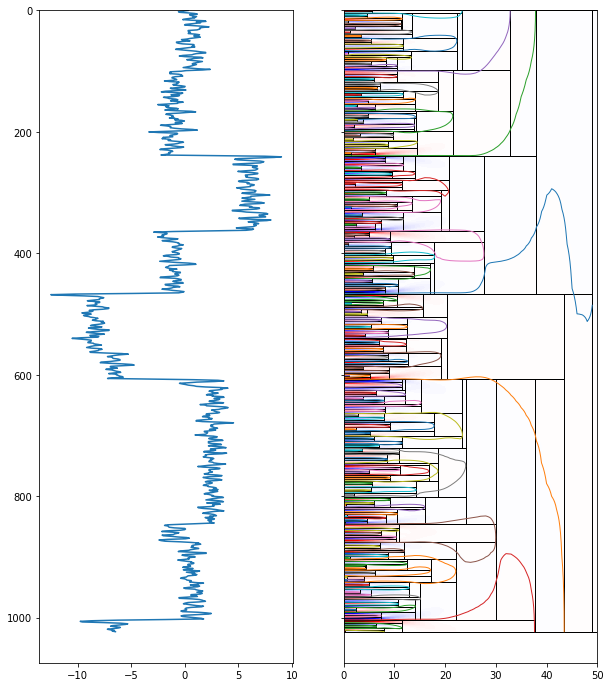

In [3]:
fig = default_display(series, scale_space, interval_tree)